# **Kütüphaneler**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Veriyi Oku**

In [32]:
df=pd.read_csv('student_lifestyle_dataset.csv')
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


# **Boxplot ile Aykırı Değer Tespiti**

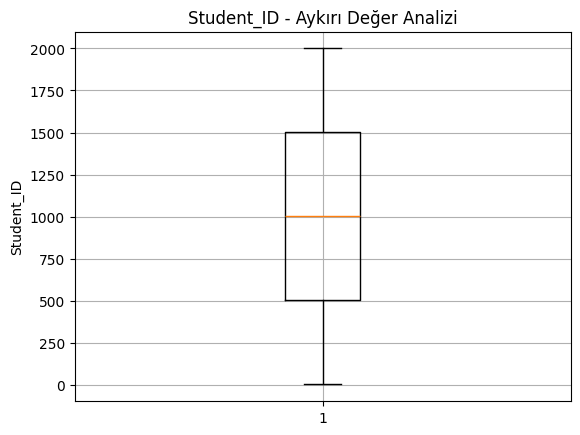

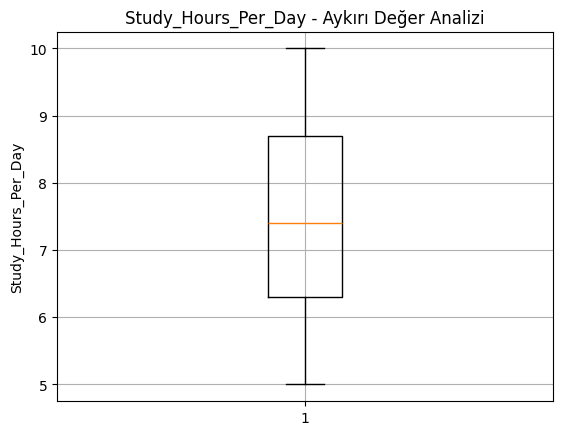

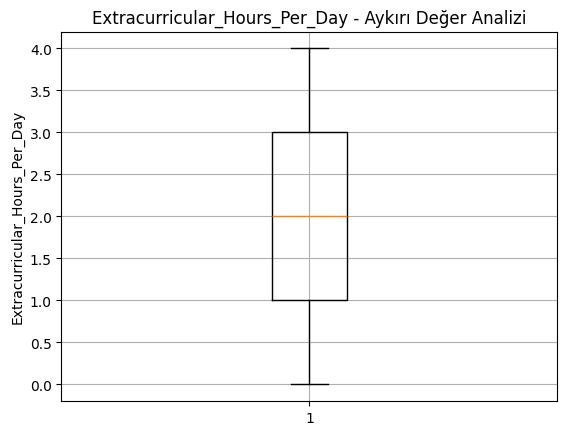

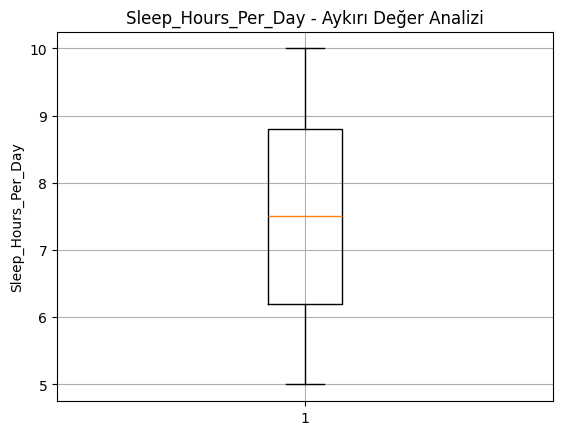

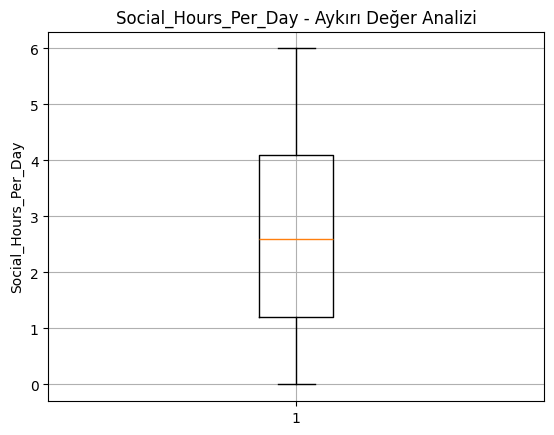

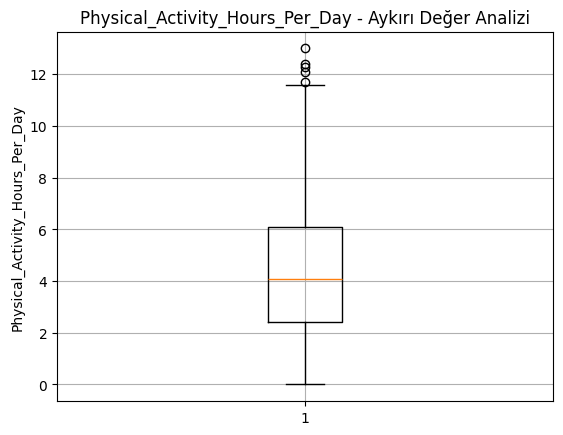

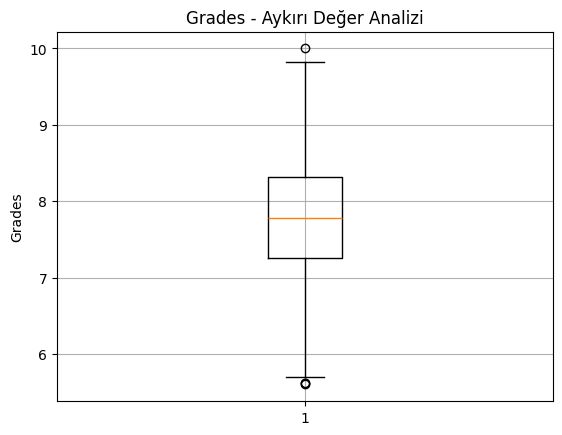

In [33]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"{col} - Aykırı Değer Analizi")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [34]:
df.drop(['Student_ID',],axis=1,inplace=True)

# **Pairplot**

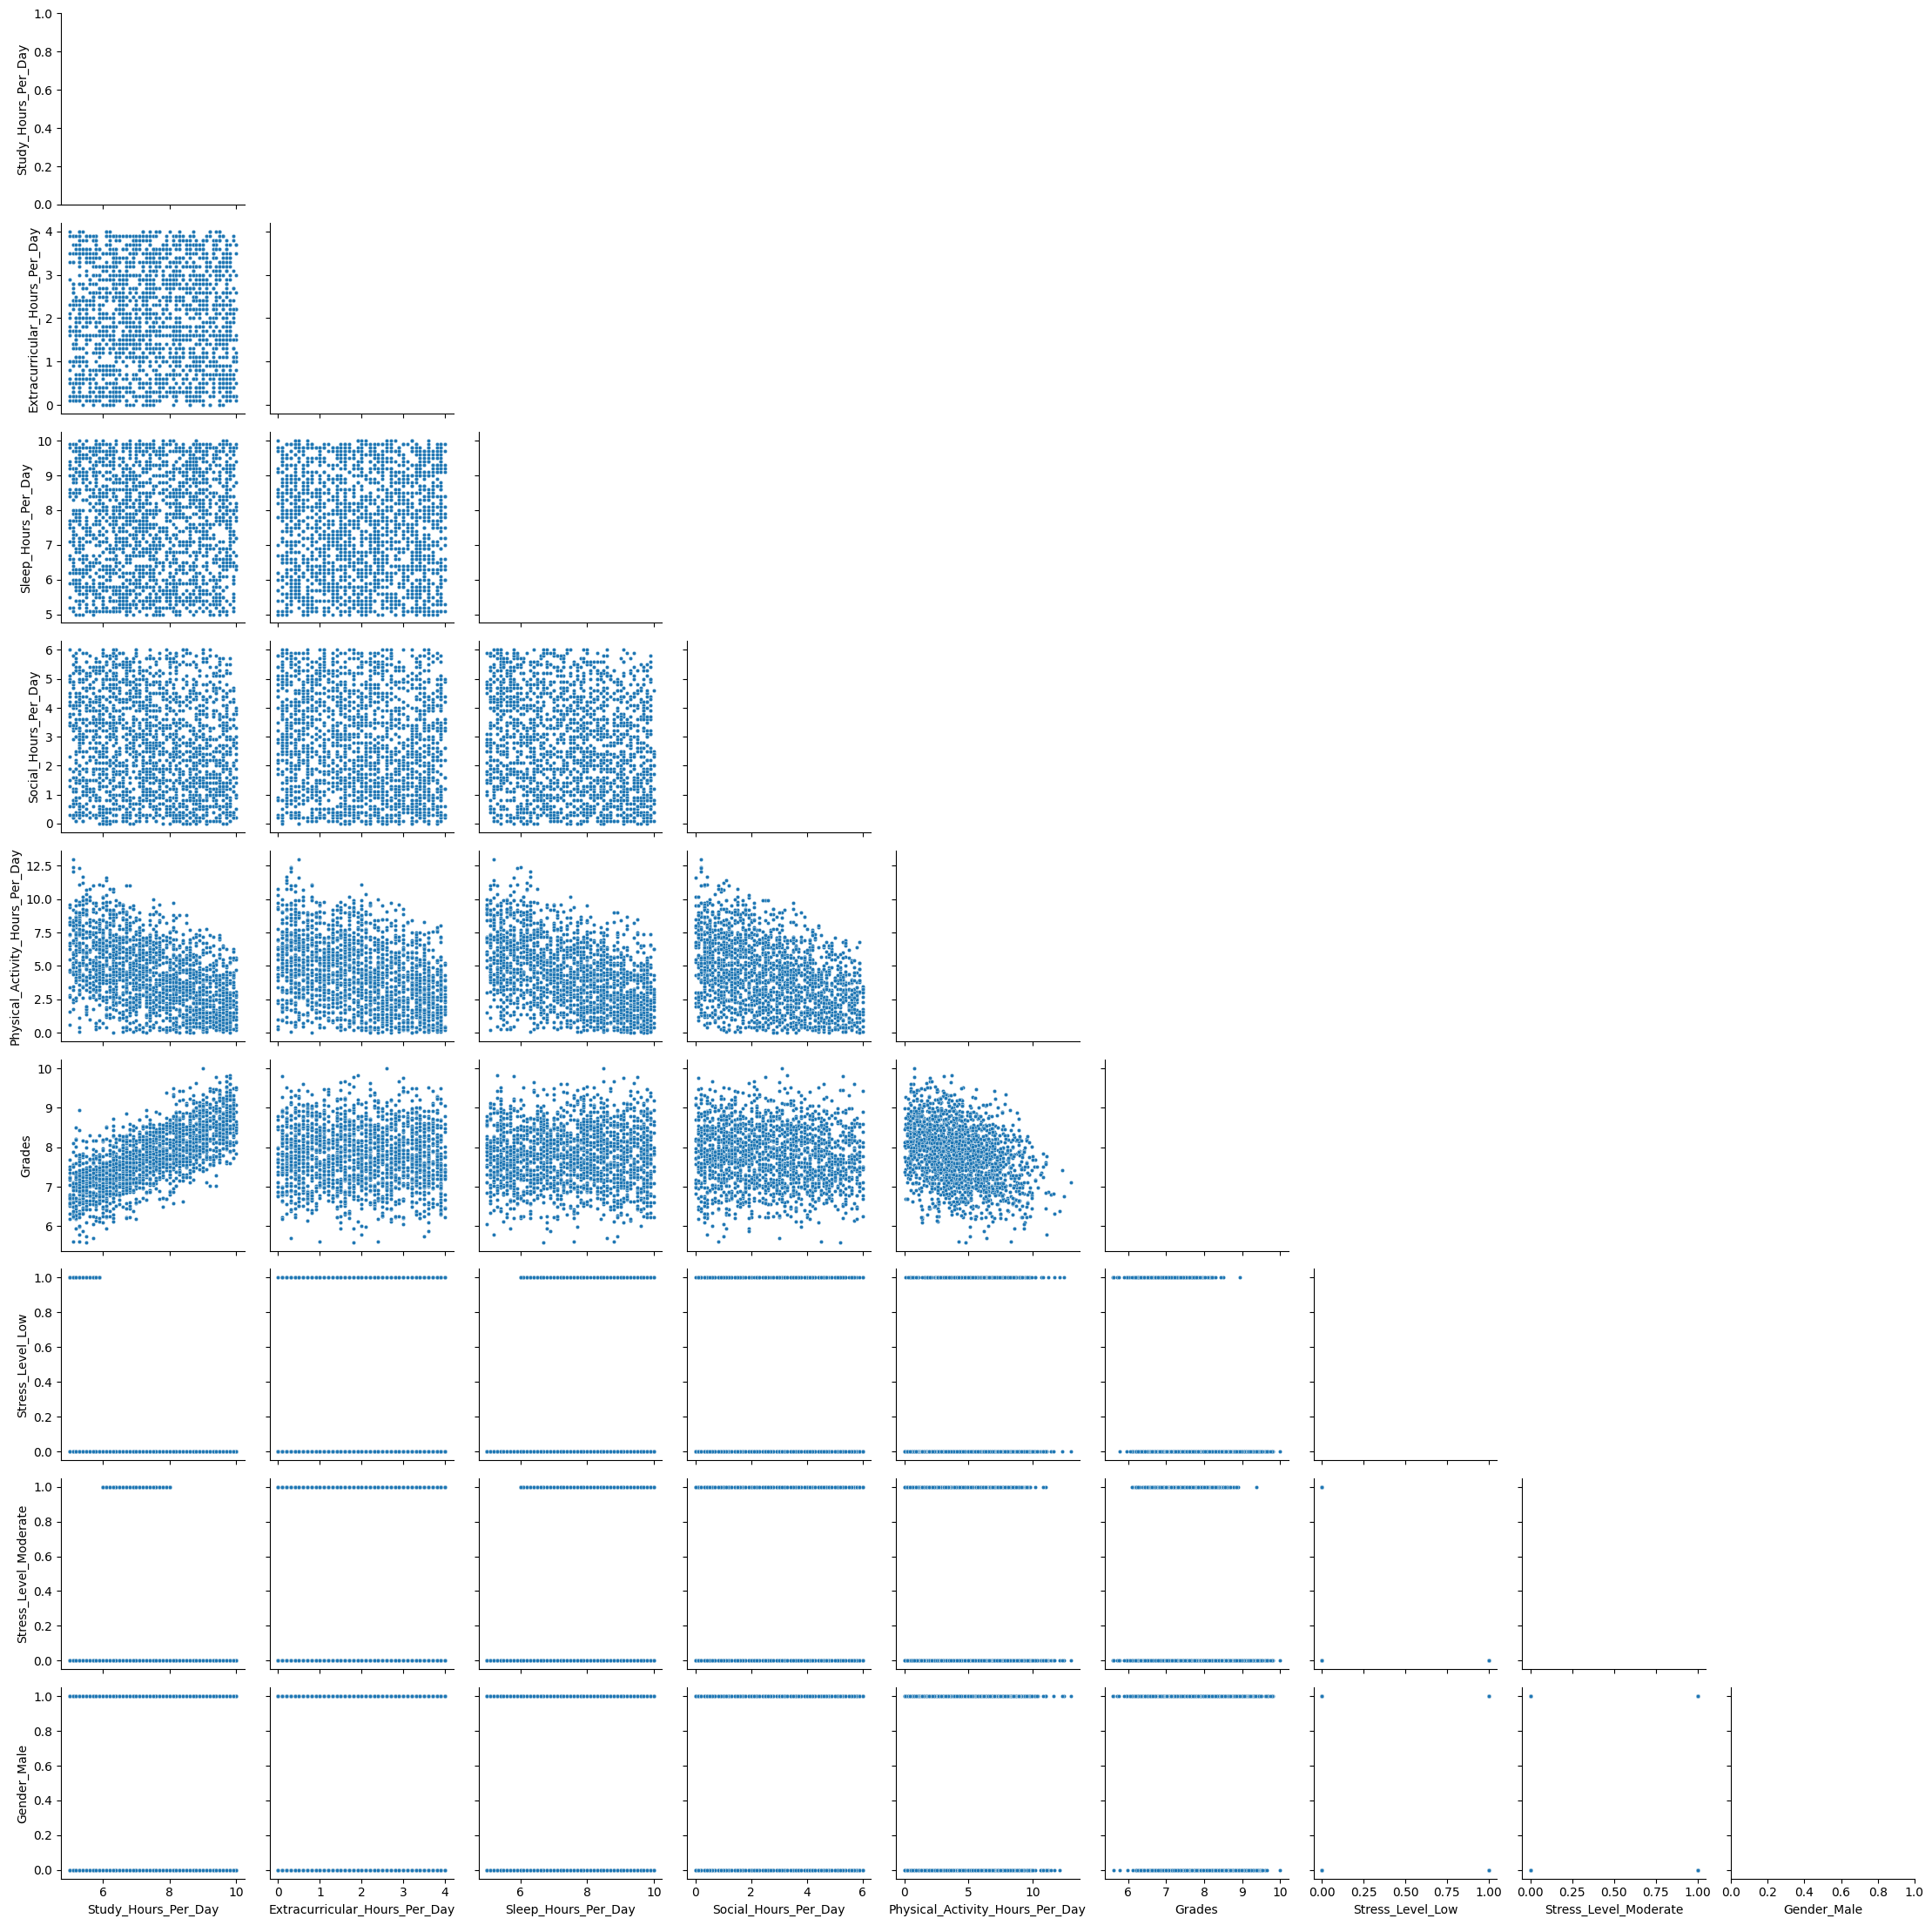

In [35]:
df = pd.get_dummies(df, drop_first=True)
g = sns.PairGrid(df, corner=True)
g.map_lower(sns.scatterplot, s=10)
plt.show()

# **Dağılım Grafikleri**

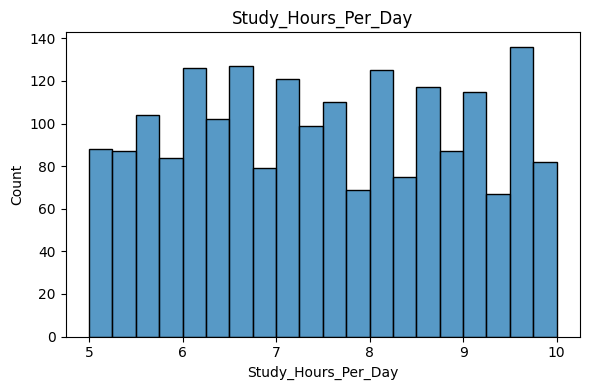

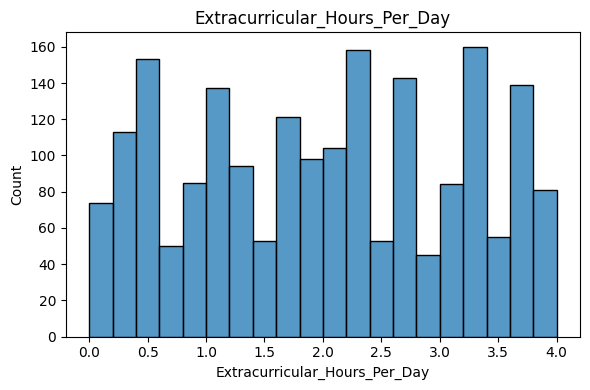

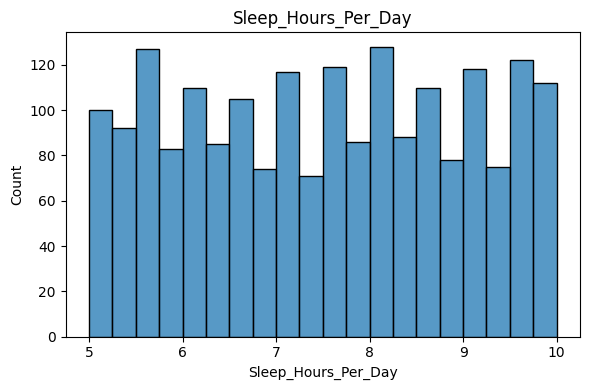

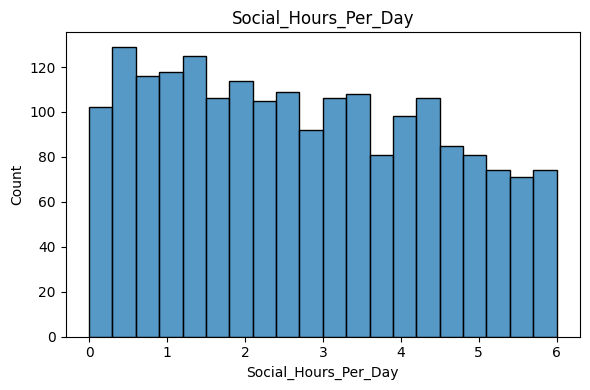

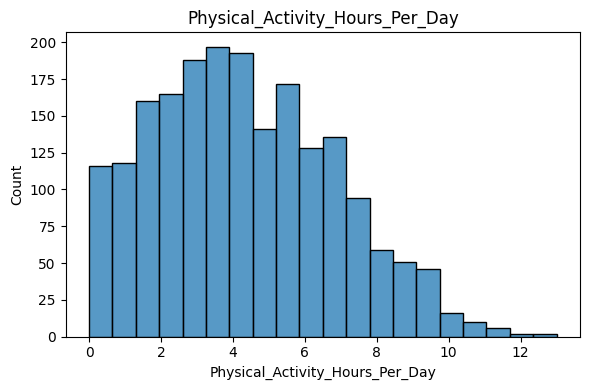

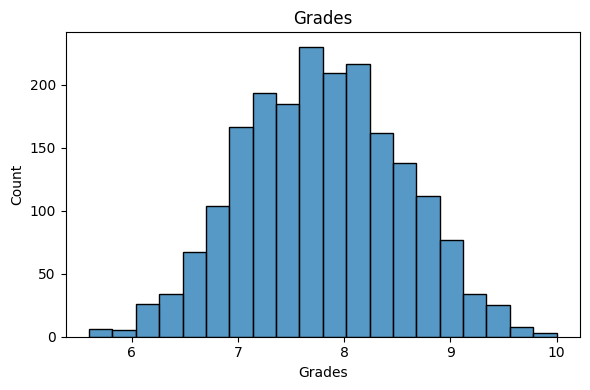

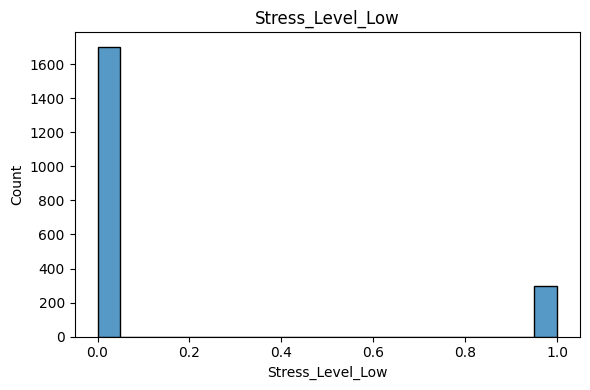

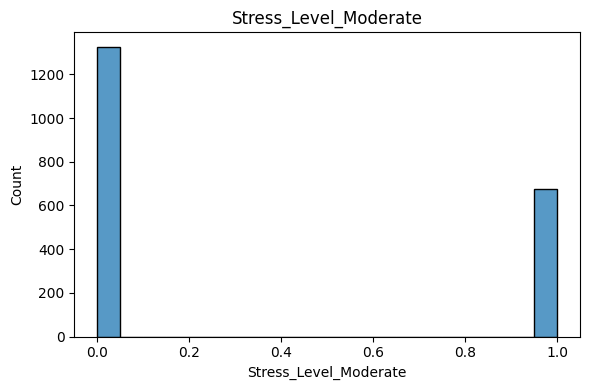

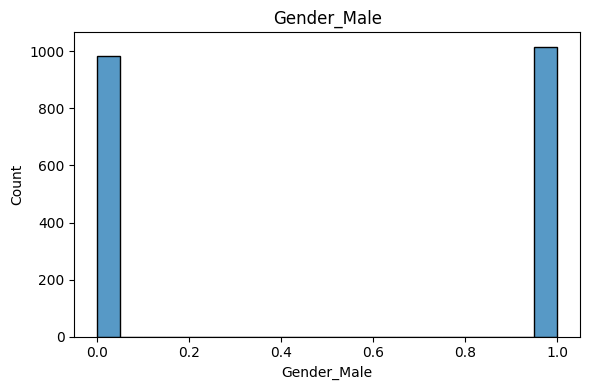

In [36]:
for col in df.columns:
    plt.figure(figsize=(6, 4))
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col].dropna(), kde=False, bins=20)
    else:
        df[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.tight_layout()
    plt.show()

# **Physical_Activity_Hours_Per_Day Sütunu için Kök Dönüşümü**

Text(0.5, 1.0, 'kök Dönüşümü Sonrası Dağılım')

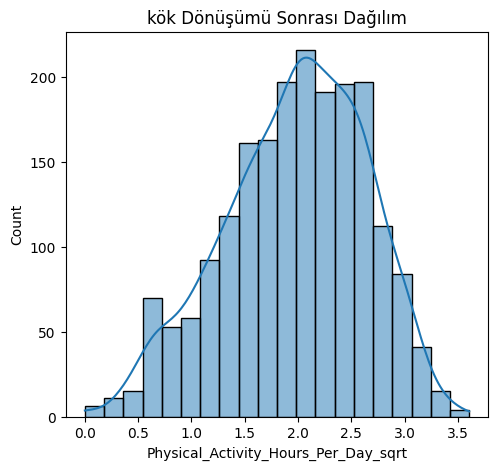

In [37]:
sqrt_phys = 'Physical_Activity_Hours_Per_Day' + "_sqrt"

df[sqrt_phys] = np.sqrt(df['Physical_Activity_Hours_Per_Day'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
sns.histplot(df[sqrt_phys].dropna(), bins=20, kde=True)
plt.title("kök Dönüşümü Sonrası Dağılım")

In [38]:
df.drop(['Physical_Activity_Hours_Per_Day'],axis=1,inplace=True)
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Grades,Stress_Level_Low,Stress_Level_Moderate,Gender_Male,Physical_Activity_Hours_Per_Day_sqrt
0,6.9,3.8,8.7,2.8,7.48,False,True,True,1.341641
1,5.3,3.5,8.0,4.2,6.88,True,False,False,1.732051
2,5.1,3.9,9.2,1.2,6.68,True,False,True,2.144761
3,6.5,2.1,7.2,1.7,7.20,False,True,True,2.549510
4,8.1,0.6,6.5,2.2,8.78,False,False,True,2.569047


# **Standartizasyon**

In [44]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['Study_Hours_Per_Day','Extracurricular_Hours_Per_Day',	'Sleep_Hours_Per_Day',	'Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day_sqrt']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[scale_cols])
df_scaled = df.copy()
df_scaled[scale_cols] = scaled_values

df_scaled.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Grades,Stress_Level_Low,Stress_Level_Moderate,Gender_Male,Physical_Activity_Hours_Per_Day_sqrt
0,-0.404487,1.566246,0.820734,0.056543,7.48,False,True,True,-0.953904
1,-1.528451,1.306633,0.341473,0.885882,6.88,True,False,False,-0.363606
2,-1.668947,1.652784,1.163063,-0.891273,6.68,True,False,True,0.260411
3,-0.685478,0.095105,-0.206253,-0.595080,7.20,False,True,True,0.872389
4,0.438487,-1.202961,-0.685514,-0.298888,8.78,False,False,True,0.901929


# **Dosyayı Kaydet**

In [46]:
df_scaled.to_excel('student_lifestyle_dataset_preprocess.xlsx',index=False)